<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/3.Pandas/Ejercicios_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>[Ejercicio 1 - Funcion retorna alumnos aprobados](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=-cgYdw9BhvnW)

>>[Ejercicio 2 - Función que cree y muestre un DataFrame](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=3i_nTU64ipey)

>>[Ejercicio 3 - DataFrame y Plot](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=SH9uM2tBlK19)

>>[Ejercicio 4 - Cargar datos desde un endpoint](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=-U-fRvQnnBvJ)



## Ejercicio 1 - Funcion retorna alumnos aprobados
Escribir una función que reciba una diccionario con las notas de los alumnos y retorne una serie con las notas de aquellos aprobados ordenadas de mayor a menor.

In [ ]:
import pandas as pd

# Implementación
#2. Funcion que procesa el dict
def aprobados(notas):
  #3. Creamos lista vacia y le vamos agregando solo las de los alumnos aprobados
  filtrado = []
  for i in notas:
    if notas[i] >= 4:
      filtrado.append(notas[i])
  #4. Creamos una serie a partir de las notas ordenadas
  ordenadas = pd.Series(filtrado.sort())
  return(filtrado)

#1. Creamos un dictionary con los alumnos y sus notas
notas = {'Deadpool':9, 'Wolverine':6.5, 'Spidy':4, 'Dopinder': 8.5, 'Weasel': 5}
print(f"Notas aprobadas: {aprobados(notas)}")

Notas aprobadas: [4, 5, 6.5, 8.5, 9]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':


## Ejercicio 2 - Función que cree y muestre un DataFrame
Escribir una función que liste los doce meses calendario de 2019 con ventas, gastos y neto obtenido.
Usar diccionarios y asignar valores aleatorios (De forma manual o con funciones). Usar la función plot para graficar el contenido de un DataFrame.


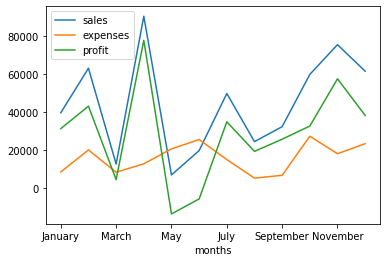

In [1]:
import pandas as pd
import numpy as np

# 1. Genero datos
import calendar
months = [calendar.month_name[i] for i in range(1,13)] #usando calendar evitamos tener que crear la lista de meses a mano haciendo: months= ['January', 'February', etc...]
sales = np.random.sample(12)*100000
expenses = np.random.sample(12)*30000
profit = [sales[i] - expenses[i] for i in range(len(sales))]

# 2. Armo el diccionario con los datos generados
dict_annual = {
    'months': months,
    'sales': sales,
    'expenses': expenses,
    'profit': profit
}

# 3. Genero el dataframe a partir del diccionario y muestro resultados
df_annual = pd.DataFrame(dict_annual)
df_annual = df_annual.set_index('months')
#print(df_annual)
grafico = df_annual.plot()




## Ejercicio 3 - DataFrame y Plot

Crear un Dataframe y graficar su contenido usando la libreria import **matplotlib.pyplot **




<function matplotlib.pyplot.show>

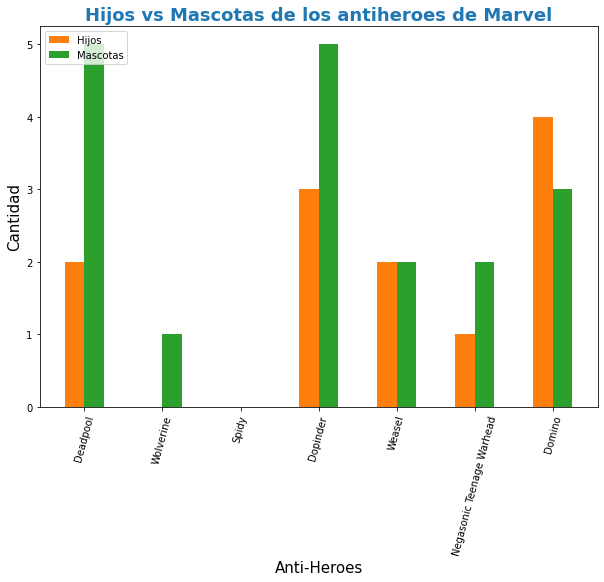

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
df = pd.DataFrame({
    'name':['Deadpool','Wolverine','Spidy','Dopinder','Weasel','Negasonic Teenage Warhead','Domino'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','M','M','M','M','F','F'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})
 
n=len(df['name'])
r=np.arange(n)
width = 0.25
 
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(r,df['num_children'],label='Hijos',color="tab:orange",width=0.25)
ax.bar(r+width,df['num_pets'],label='Mascotas',color="tab:green",width=0.25)
ax.set_title('Hijos vs Mascotas de los antiheroes de Marvel', loc = "Center", fontdict = {'fontsize':18, 'fontweight':'bold', 'color':'tab:blue'})
ax.legend(loc = 'upper left')
plt.xticks(r + width/2,df['name'],rotation=75)
plt.xlabel("Anti-Heroes",fontsize=15)
plt.ylabel("Cantidad",fontsize=15)
plt.show




## Ejercicio 4 - Cargar datos desde un endpoint

Tomando datos desde una URL, convertir esa información en un DataFrame para luego poder operar

In [6]:
import pandas as pd
import requests #Librería que nos permite interactuar con recursos html
url = 'https://www.worldcoinindex.com/' # Endpoint desde donde tomaremos los datos
coin_url = requests.get(url) #Asignamos la información en la variable crypto_url
coin_url

<Response [200]>

In [16]:
coin_data = pd.read_html(coin_url.text) #Leemos el html y lo asignamos a la variable
#coin_data

# 1. Obtengo el data frame
coin_df = coin_data[0]

# 2.  Un rápido data cleaning
coin_df = coin_df.drop(columns=['#', 'Unnamed: 1']) # Elimino columnas sin información
# Reviso qué columna tiene más nulos
coin_df.isnull().sum(axis = 0) 

In [19]:
# Vemos que la columna "Price Charts 7d" tiene 100 nulos, cuando el dataframe tiene 102 valores en total, por lo tanto elimino esta columna
coin_df = coin_df.drop(columns=['Price Charts 7d'])

#3. Muestro el resultado
coin_df

,Name,Ticker,Last price,%,24 high,24 low,24 volume,# Coins,Market cap
0,Bitcoin,BTC,"$ 28,913",-4.56%,"$ 30,734","$ 28,738",$ 8.83B,19.04M,$ 550.65B
1,Ethereum,ETH,"$ 1,938.23",-3.97%,"$ 2,061.42","$ 1,922.09",$ 6.87B,120.85M,$ 234.24B
2,Binanceusd,BUSD,$ 1.00,-0.04%,$ 1.00,$ 0.997296,$ 1.26B,1.68B,$ 1.68B
3,Solana,SOL,$ 48.42,-7.19%,$ 53.53,$ 47.87,$ 886.93M,261.90M,$ 12.67B
4,Ripple,XRP,$ 0.404659,-3.76%,$ 0.438862,$ 0.403207,$ 861.75M,48.34B,$ 19.56B
...,...,...,...,...,...,...,...,...,...
97,FC Porto,PORTO,$ 2.38,+16.47%,$ 2.86,$ 1.99,$ 27.74M,NaN,NaN
98,Swipe,SXP,$ 0.435275,-4.13%,$ 0.468842,$ 0.432121,$ 26.83M,187.37M,$ 81.55M
99,Aelf,ELF,$ 0.147526,-4.90%,$ 0.164458,$ 0.145807,$ 26.66M,250.00M,$ 36.88M
100,Originprotocol,OGN,$ 0.232546,-10.33%,$ 0.265903,$ 0.228311,$ 26.33M,275.47M,$ 64.06M
